In [8]:
install.packages('factoextra')

Installing package into ‘/home/krista/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
also installing the dependencies ‘modeltools’, ‘DEoptimR’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘mvtnorm’, ‘robustbase’, ‘kernlab’, ‘trimcluster’, ‘fpc’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’



In [9]:
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering visualization
library(dendextend) # for comparing two dendrograms


source("../../../spydr_scripts/functions/get_os.R")

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ

---------------------
Welcome to dendextend version 1.8.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: ‘dendextend’

The following object is masked from ‘package:stats’:

    cutree



In [10]:
os <- get_os()
if (os == 'linux'){home <- '/home/krista/'
} else if(os == 'osx'){home <- '/Users/67981492/'}

agg_data_path = paste0(home,'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/')
setwd(agg_data_path)

In [35]:
df <- read_csv('combined_learning_sig_obs_data.csv',col_types = cols())

(n_subjects = length(unique(df$ID)))
(n_conditions = length(unique(df$condition)))

# head(df)

cluster_df <- df[,c('cpp', 'B', 'rt', 'ID', 'condition')]
cluster_df <- subset(cluster_df, ID == '761')
head(cluster_df, 5)

Warning message:
“Missing column names filled in: 'X1' [1]”

[1] 24

[1] 4

cpp,B,rt,ID,condition
0.02184024,0.00000000,0.7115700,761,hc
0.01904395,0.00000000,0.6814098,761,hc
0.01802175,-0.03276036,0.7671180,761,hc
0.01750342,0.00729646,0.5072088,761,hc
0.01719738,0.03962128,0.6562591,761,hc


### Hierarchical clustering 

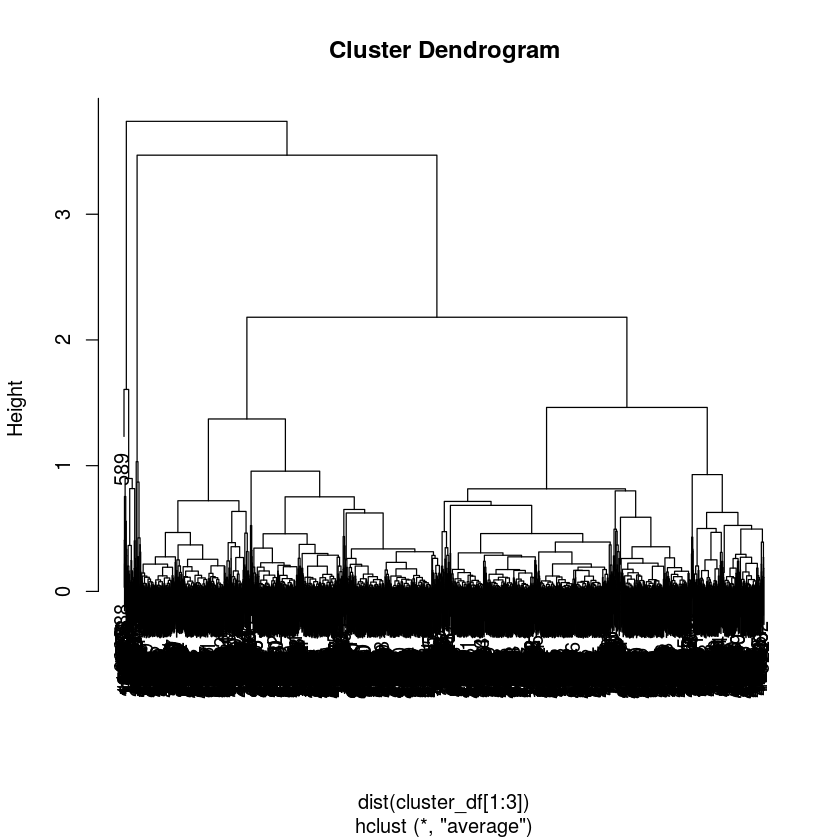

In [37]:
clusters <- hclust(dist(cluster_df[1:3]), method = 'average')
plot(clusters)

In [45]:
kmeans_cluster <- kmeans(cluster_df[,c('rt', 'B')],4, nstart = 20)

In [46]:
table(kmeans_cluster$cluster, cluster_df$condition)

   
     hc  hv  lc  lv
  1 227 183 124 190
  2  48  81 127  75
  3 114 137 145 140
  4 211 199 204 195

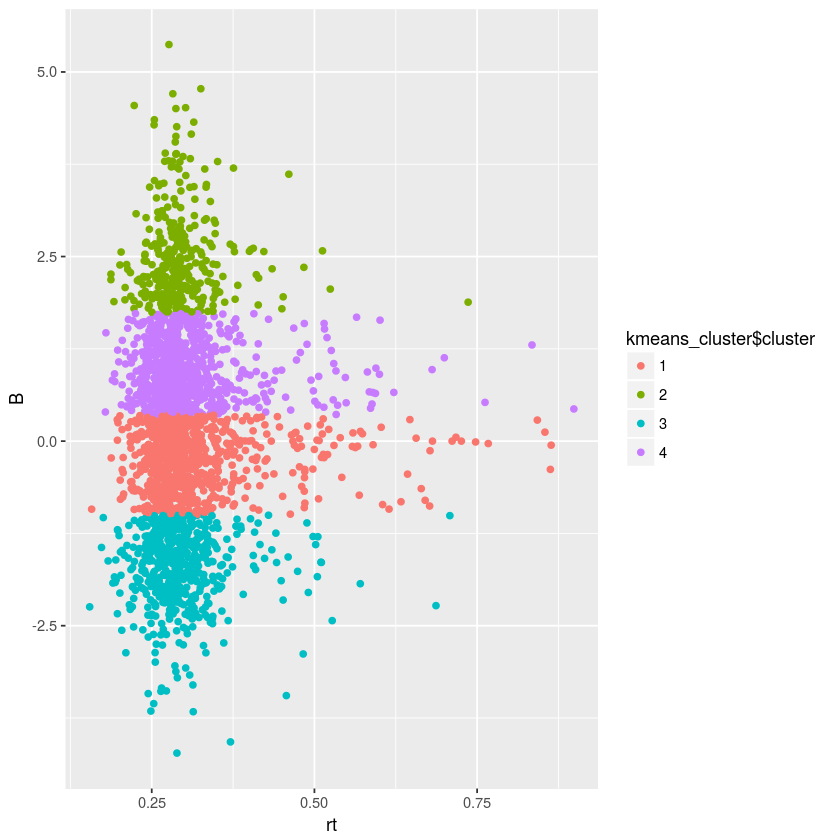

In [49]:
kmeans_cluster$cluster <- as.factor(kmeans_cluster$cluster)
ggplot(cluster_df, aes(rt, B, color = kmeans_cluster$cluster)) + geom_point()